# Test the retrained YOLO model

Now that we have retrained our model we can test it against our 'test' images.

In [7]:
# If you did not use the Workbench image designed for this Lab, you can uncomment and run the following line to install the required packages.
# !pip install --no-cache-dir --no-dependencies -r requirements.txt

from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np

In the last notebook we saw how to re-trained the model. As this is a time-consuming tasks that would require GPUs to be efficient, we cannot really do it during the workshop.

So for your convenience, an already re-trained model, exported in the ONNX format, is available.

In [8]:
# Get the newly trained model.

model = YOLO("https://rhods-public.s3.amazonaws.com/demo-models/ic-models/accident/accident_detect.onnx", task="detect")

Found https://rhods-public.s3.amazonaws.com/demo-models/ic-models/accident/accident_detect.onnx locally at accident_detect.onnx


In [9]:
# Test the model against a car accident image

#results = model.predict("images/carImage3.jpg")  # We know that Image3 represents a severe accident with over 86% certainty.

In [10]:
# Extract all the information from the result (type, bounding box, probability)

original_image: np.ndarray = cv2.imread("images/carImage3.jpg")
blob = cv2.dnn.blobFromImage(original_image, size=(640, 640), swapRB=False)
blob = np.ascontiguousarray(blob[0].transpose((1,2,0)))
results = model.predict(blob)

Loading accident_detect.onnx for ONNX Runtime inference...

0: 640x640 1 severe, 783.2ms
Speed: 4.1ms preprocess, 783.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


In [11]:
# Extract all the information from the result (type, bounding box, probability)

result = results[0]
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: severe
Coordinates: [133, 171, 634, 551]
Probability: 0.91
---


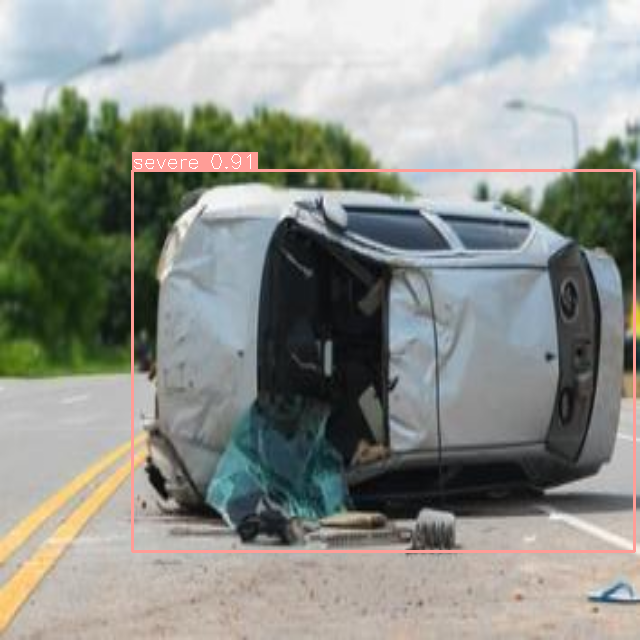

In [12]:
# On the image, draw the box, the name of the class, and the probability (how much the model is sure about the detection).

Image.fromarray(result.plot()[:,:,::-1].astype(np.uint8))

In examining 'carImage3.jpg' the re-trainined YOLO model correctly predicts a 'car accident' with 86% confidence.  A box is then drawn around the car accident and labelled with `severe 0.86`.

Now that we have a model which can detect accident severity, let's create a predict function and serve our  model with ModelMesh.

**Go back to the Instructions of the Lab, to lear how to do that.**

**DO NOT open notebook `04-05-model-serving.ipynb` yet**.